In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

datum = pd.read_csv("airquality.tsv", sep="\t", index_col=0, usecols=[0, 1, 2, 3, 4])

In [2]:
filtered_datum = datum.dropna()
datum_array = np.transpose(filtered_datum.reset_index().values)
ozones = datum_array[1]
winds = datum_array[3]
temps = datum_array[4]

In [3]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(np.transpose(np.array([winds, temps, ozones])))

array([[ -3.10799020e+00,  -1.02035767e+01,  -3.22018396e+00],
       [ -7.01255676e+00,  -4.31032648e+00,  -2.60053715e+00],
       [ -3.03483013e+01,   2.39791849e+00,   8.05703923e-01],
       [ -2.68606386e+01,  -1.05202428e+01,  -6.66477428e-01],
       [ -2.11770342e+01,  -8.48950496e+00,  -3.11244239e+00],
       [ -2.66440909e+01,  -1.37646722e+01,   1.50533868e+00],
       [ -3.73906539e+01,  -9.82394957e+00,   7.30810428e+00],
       [ -2.72715082e+01,  -3.18276384e+00,  -2.16066239e+00],
       [ -3.27347002e+01,  -5.05726327e+00,  -3.10394630e+00],
       [ -2.95067947e+01,  -3.80143964e+00,  -1.13074266e+00],
       [ -2.77858125e+01,  -1.45075107e+01,   7.94942496e-01],
       [ -3.03606586e+01,  -7.73815980e+00,  -7.65844429e-01],
       [ -1.04480689e+01,  -9.94410504e+00,   9.29023070e-01],
       [ -4.00491673e+01,  -1.32412247e+01,   5.27229070e+00],
       [ -1.39156754e+01,  -7.13904580e+00,   3.31237117e-01],
       [ -3.35820815e+01,  -8.98938818e+00,  -2.8387318

In [4]:
pca.get_covariance()

array([[   12.54329356,   -16.70529989,   -71.85798231],
       [  -16.70529989,    90.00211022,   219.52503855],
       [  -71.85798231,   219.52503855,  1097.31450369]])

In [5]:
pca.explained_variance_ratio_

array([ 0.95666861,  0.03693549,  0.0063959 ])

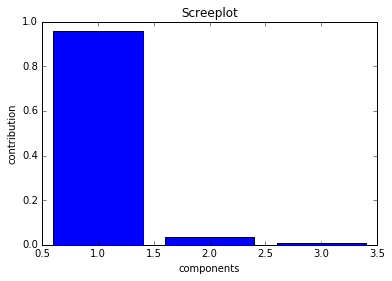

In [6]:
plt.bar([1, 2, 3], pca.explained_variance_ratio_, align = "center")
plt.title("Screeplot")
plt.xlabel("components")
plt.ylabel("contribution")
plt.show()

In [7]:
u = pca.components_[0]
v = pca.components_[1]

In [8]:
mean = pca.mean_

In [9]:
coeff = np.asarray(np.dot(np.array([u[2], v[2]]), np.matrix([[u[0], v[0]], [u[1], v[1]]]).I))[0]

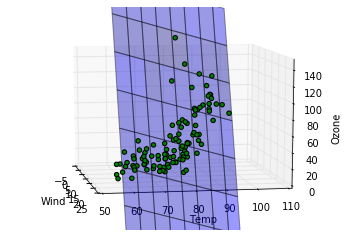

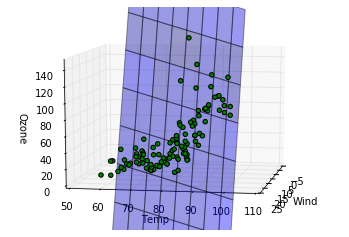

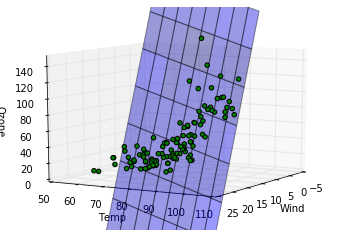

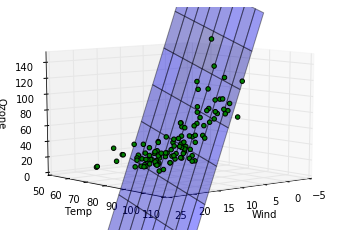

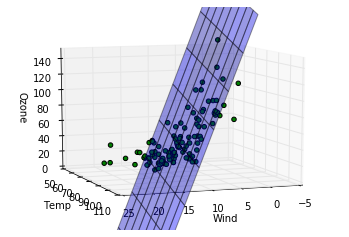

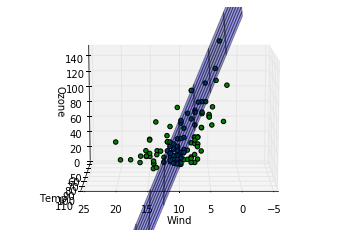

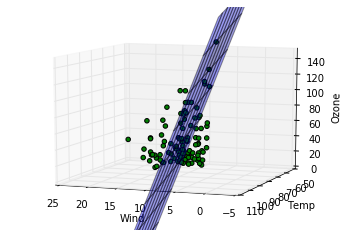

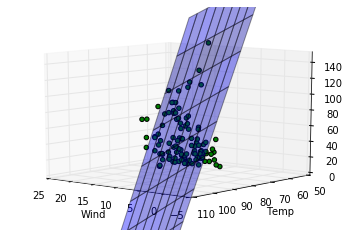

In [11]:
from mpl_toolkits.mplot3d import Axes3D

def show_with_angle(angle):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev = 10., azim = angle)
    x = np.arange(0, 20, 0.5)
    y = np.arange(60, 100, 1.0)
    X, Y = np.meshgrid(x, y)
    Z = coeff[0] * (X - mean[0]) + coeff[1]  * (Y - mean[1]) + mean[2]
    surf = ax.plot_surface(X, Y, Z, rstride = 5, cstride = 5, alpha = 0.4)
    ax.set_zlim(0, 150)
    ax.scatter(winds, temps, ozones, c='green', marker='o', alpha=1)
    ax.set_xlabel('Wind')
    ax.set_ylabel('Temp')
    ax.set_zlabel('Ozone')
    plt.show()
    
for angle in range(-10, 150, 20):
    show_with_angle(angle)